## Using Half-Time Statistics to Predict the Outcome of a Soccer Game.

#### DSCI 100 - 005, GROUP 03, CARLOS PEREZ, ABBEY DORIS, ARMAN MOZTARZADEH, DARREN LIU.

## Introduction

Betting on the outcome of sports matches has become very popular in the sporting community, making up roughly 30 to 40 percent of the global gambling market (“Most Popular Sports to Bet On”, 2022). Additionally, it is estimated that a total of over $700 million is put into bets annually, with some of the largest unions having hundreds of thousands of customers from all around the world alongside AI-powered algorithms. It is predicted that approximately 7 billion dollars will be generated in revenue by 2025, from only 833 million dollars in 2019 in just the United States alone. Unfortunately, inaccurate assessment of data will more than likely result in incorrect outcomes, which would surely wash lots of money down the drain. With its growing popularity comes the increasing need to be accurate when casting one’s bet on a game, especially when an AI is involved, as a multitude of factors must all be considered, raising issues of reliability. In today’s world, “highly complex computer systems offer a more comprehensive insight into a football match’s data. The numbers and statistics gained lead to a large volume of new sorts of information about the match.” (Horkey et al., 2016). To address these issues, we created a tool using regression to accurately and reliably predict the outcome of sports games.

To solve the issue outlined previously, we will be creating a regression model to answer the question “How do current match plays and statistics influence the outcome of a soccer game and how can one predict the outcome of a soccer game using match plays/statistics and current betting odds to accurately predict how much the winning team will win by.” 

For our analysis, we gathered our quantitative data from datahub.io (https://datahub.io/sports-data/english-premier-league#resource-season-1819) which stores centralized sports data from various premier league seasons. We decided to focus our report on the most recent season that the database contained, (2018 season). Since our report was focused on betting on the outcome of a match, we chose to only incorporate the variables that were pertinent to our dataset. As a result, variables such as FTR (Full Time Result) and Referee were dropped, as we collectively agreed that they were completely unrelated to our goal, while other more relevant ones, such as HTAG (Half Time Away Team Goals). Despite our dataset containing the relevant information we needed to make our prediction, we chose to further manipulate and create a new variable to add more depth and context to our report. This new variable was the value of NetScore, which allowed us to incorporate the final predictions into a single variable instead of performing regression twice on two different variables. 

There are also various betting websites in which people can bet on soccer games. These betting websites also release the “betting odds” to the public as statistics which were incorporated into our prediction variables to maximise precision and accuracy in our betting odds. By studying what other people were betting, we were able to use how the general public perceived the chances of a certain team winning into our own regression model. This allowed us to have our regression model be influenced by current match statistics and the public perception. The public perception can give insight that current match statistics can’t, like if a key player is going to be substituted on or off later on in the match.

## Methods & Results

Firstly, various libraries were loaded into R to have access to the functions used in the regression (repr, tidyverse, tidymodels, digest, GGally, ISLR). The data was then loaded from a URL and mutated into the data types that were best to work with. Next, we took our match data and used an “initial_split” function to split the data into 25% testing data and 75% training data using “FTR” as a strata. This meant that the testing and training data had an equal proportion of games where the home team won, lost, or tied. 

Afterwards, we created a new variable column that combined the scores of the home team and the away team into a column called “NetScore”. The value of “NetScore” represented the difference in score between the home and away team, with a positive “NetScore” meaning that the home team won and a negative value representing the away team winning. The tibbles are presented in the code for a clear picture of what each value represents in a match context. Next we provide a summary of the data representing which soccer teams won the most amount of games at home and away.


Up next, we work on creating two regression models, using the KNN algorithm and linear algorithm. We do both so we can compare which model gives the lowest RMPSE which will signal which model performs the best. 

Within the KNN regression model, 3 sub-recipes are created in order to compare which predictor variables give the lowest RMSE value. Next we perform a 5-fold cross-validation on the training data so that we remove variations due to random data selection. Then each individual recipe is worked into the corresponding workflow. We then create a tibble in order to test possible values of k ranging from 1 to 200. Then we used the “collect_metrics'' function to receive numerical estimates of the mean RMSE value to choose the best possible combination of variables. Using the k value given by the best variable recipe, we fit the workflow to the training recipe and test it with the testing to each the RMPSE of our model.

Next we visualize the analysis of our data using “ggplot” and “geom_histogram". 

Then we create the linear regression model using the “linear_reg” function. We use the recipe we determined was best to create the linear regression workflow. Then we fit the model to the training data using the “fit” function and finalize the regression model.

Then to determine whether linear or KNN regression was better, we create two histograms side by side, with the error distribution as the x-axis and the count as the y-axis. This allows us to see what model has a peak at optimum value, and to determine which model gives the more accurate prediction. 

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)
library(digest)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)
set.seed(7493)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

Here we are reading the data. From a URL and changing the values of the AwayTeam and HomeTeam as factors to create distinct teams. Next, the results to be predicted, FTHG and FTAG are also changed to integer values instead of decimals because the number of goals scored in a soccer game is always an integer value. FTHG = full time home goals. FTAG = full time away goals. We also change FTR (full time results) to factors so the data can be split evenly. FTR is also a value to be predicted.

In [59]:
url <- "https://raw.githubusercontent.com/armanmoztar/group-project/main/data/season_2018.csv"

match_data <- read_csv(url) %>%    # reading the csv from url
            mutate(FTR = as_factor(FTR),       # mutate changes the data in the types we want
                  AwayTeam = as_factor(AwayTeam),
                  FTHG = as.integer(FTHG),
                  FTAG = as.integer(FTAG),
                  HomeTeam = as_factor(HomeTeam))

Parsed with column specification:
cols(
  .default = col_double(),
  Div = col_character(),
  Date = col_character(),
  HomeTeam = col_character(),
  AwayTeam = col_character(),
  FTR = col_character(),
  HTR = col_character(),
  Referee = col_character()
)

See spec(...) for full column specifications.



### Table 1

In [36]:
match_data

Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,⋯,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
<chr>,<chr>,<fct>,<fct>,<int>,<int>,<fct>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,⋯,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,⋯,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,⋯,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
E0,12/05/2019,Southampton,Huddersfield,1,1,D,1,0,H,⋯,2.29,22,-1.5,2.27,2.16,1.80,1.73,1.37,5.36,8.49
E0,12/05/2019,Tottenham,Everton,2,2,D,1,0,H,⋯,2.07,19,-0.5,2.13,2.08,1.85,1.80,1.91,3.81,4.15
E0,12/05/2019,Watford,West Ham,1,4,A,0,2,A,⋯,2.44,19,-0.5,2.25,2.19,1.78,1.72,2.11,3.86,3.41


Below we create an initial split of data to separate the training and testing data. We are using a proportion of 75% training data and 25% testing data. The strata is set to FTR (full time results), to get an even split of games where the home team wins and where the home team loses. 

In [37]:
match_split <- initial_split(match_data, prop = 3/4, strata = "FTR")   # creating the initial split with the parameters described above
match_train <- training(match_split)   # the training data
match_test <- testing(match_split)     # the testing data


This is just a simple visualization to demonstrate what our data represents. Below represents the number of matches won by each home team. We are using the group by and summary functions to see which teams have won the most amount of games and home and the most amount of games away. Note: This visualization is not essential to the regression but demonstrates how the results of our data can be used to create predictions for tables of this sort. Being able to make predictions like this table can guide a person's betting decisions.  

In [38]:
training_summary_netscore <- match_train %>%   
                group_by(FTR, HomeTeam, AwayTeam, FTHG, FTAG) %>%
                summarize() %>% 
                mutate(Net_Score = FTHG - FTAG) # this subtracts the full time home team goals from the full time away team goals. 
                                                # this value (NetScore) represents which team wins the game and by how much. For example
                                                # if the value is 0, then the game ends in a draw, if the value is positive, then the home team
                                                # scored more goals, meaning that the home team won and if the value is negative, then the away
                                                # team won by the amount given as NetScore. 

`summarise()` regrouping output by 'FTR', 'HomeTeam', 'AwayTeam', 'FTHG' (override with `.groups` argument)



### Table 2

In [39]:
training_summary_netscore

FTR,HomeTeam,AwayTeam,FTHG,FTAG,Net_Score
<fct>,<fct>,<fct>,<int>,<int>,<int>
H,Man United,Leicester,2,1,1
H,Man United,Everton,2,1,1
H,Man United,West Ham,2,1,1
⋮,⋮,⋮,⋮,⋮,⋮
D,Crystal Palace,Everton,0,0,0
D,Crystal Palace,Newcastle,0,0,0
D,Crystal Palace,Arsenal,2,2,0


In [40]:
training_summary_nwin_home <- match_train %>% 
                group_by(FTR, HomeTeam) %>%
                summarize(TotalWinsHome = n()) %>% 
                arrange(desc(TotalWinsHome))  # arranging by descending number of wins


`summarise()` regrouping output by 'FTR' (override with `.groups` argument)



### Table 3

In [41]:
training_summary_nwin_home

FTR,HomeTeam,TotalWinsHome
<fct>,<fct>,<int>
H,Liverpool,16
H,Arsenal,12
H,Man City,12
⋮,⋮,⋮
A,Man City,1
D,Fulham,1
D,Newcastle,1


In [42]:
training_summary_nwin_away <- match_train %>% 
                group_by(FTR, AwayTeam) %>%
                summarize(TotalWinsAway = n()) %>% 
                arrange(desc(TotalWinsAway))  # arranging by descending number of wins


`summarise()` regrouping output by 'FTR' (override with `.groups` argument)



### Table 4

In [43]:
training_summary_netscore

FTR,HomeTeam,AwayTeam,FTHG,FTAG,Net_Score
<fct>,<fct>,<fct>,<int>,<int>,<int>
H,Man United,Leicester,2,1,1
H,Man United,Everton,2,1,1
H,Man United,West Ham,2,1,1
⋮,⋮,⋮,⋮,⋮,⋮
D,Crystal Palace,Everton,0,0,0
D,Crystal Palace,Newcastle,0,0,0
D,Crystal Palace,Arsenal,2,2,0


We plan on using a regression model to predict the value of net score, which will be able to give us our intended results, which are which team wins the game, and by how much.
The below visualization in a form of a scatter plot demonstrates how we will take the value of our prediction (NetScore) and extract the final data we want, which includes which team won and by how much.

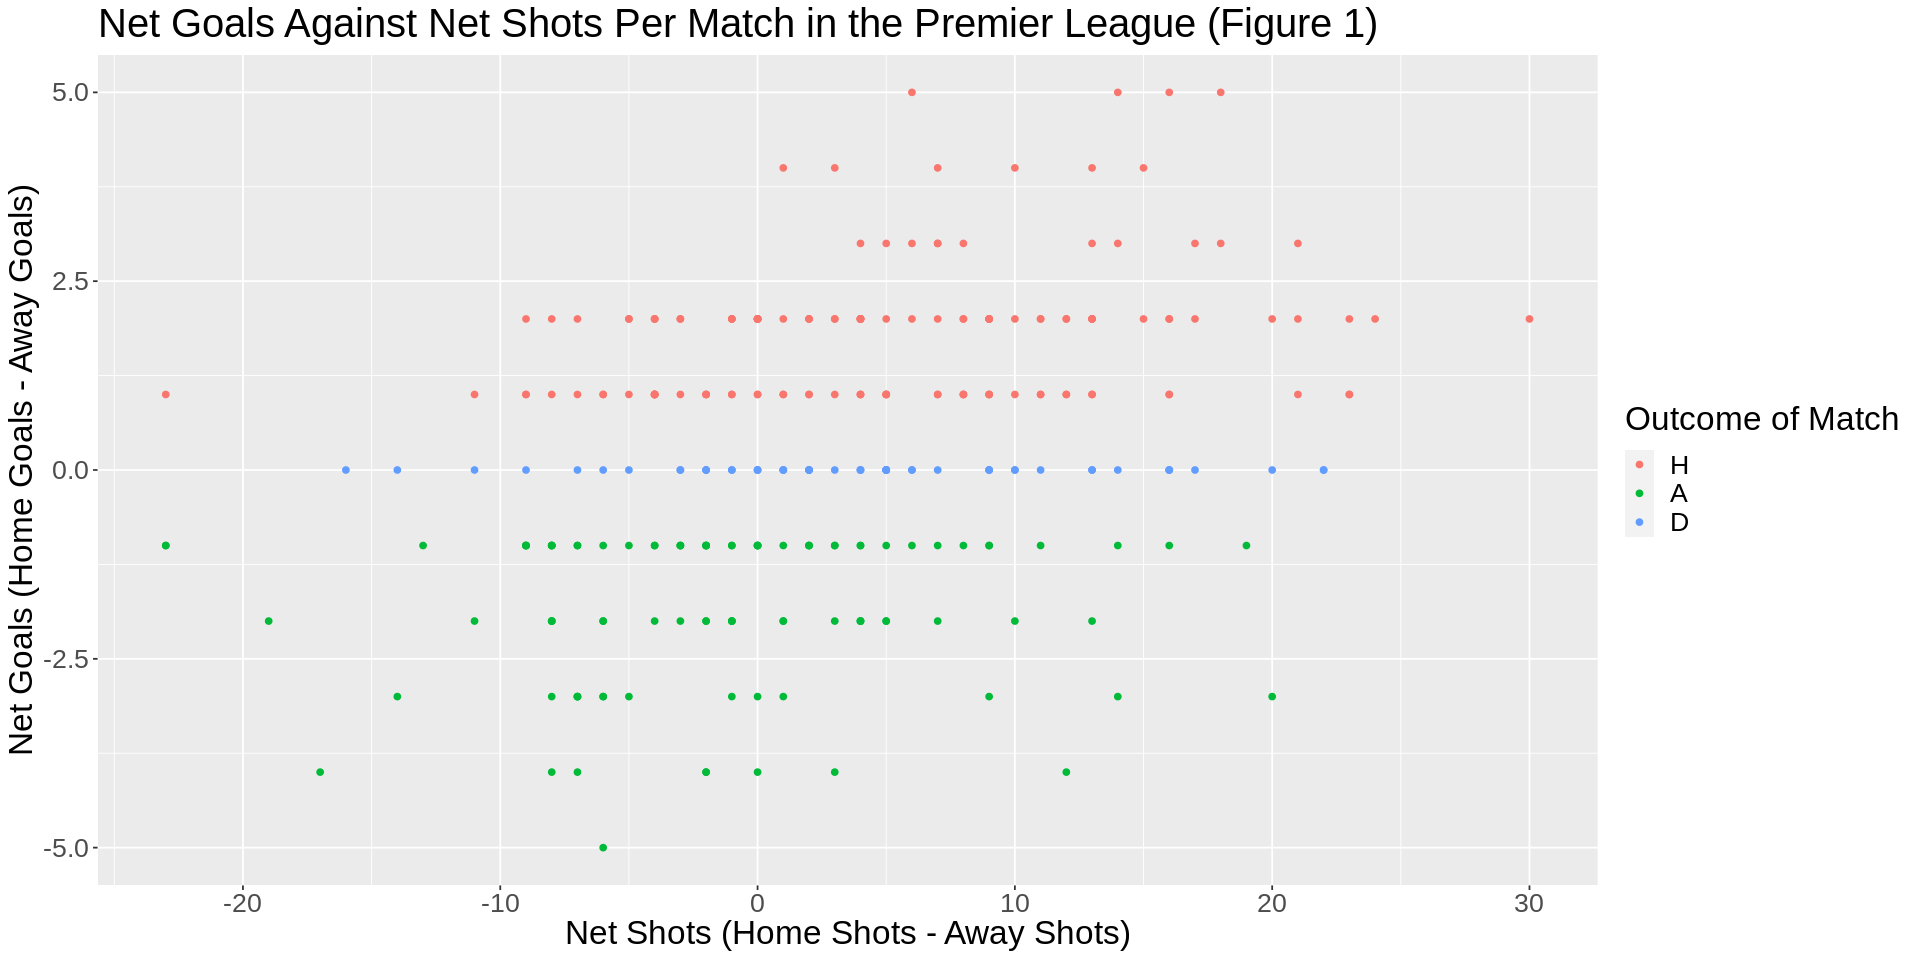

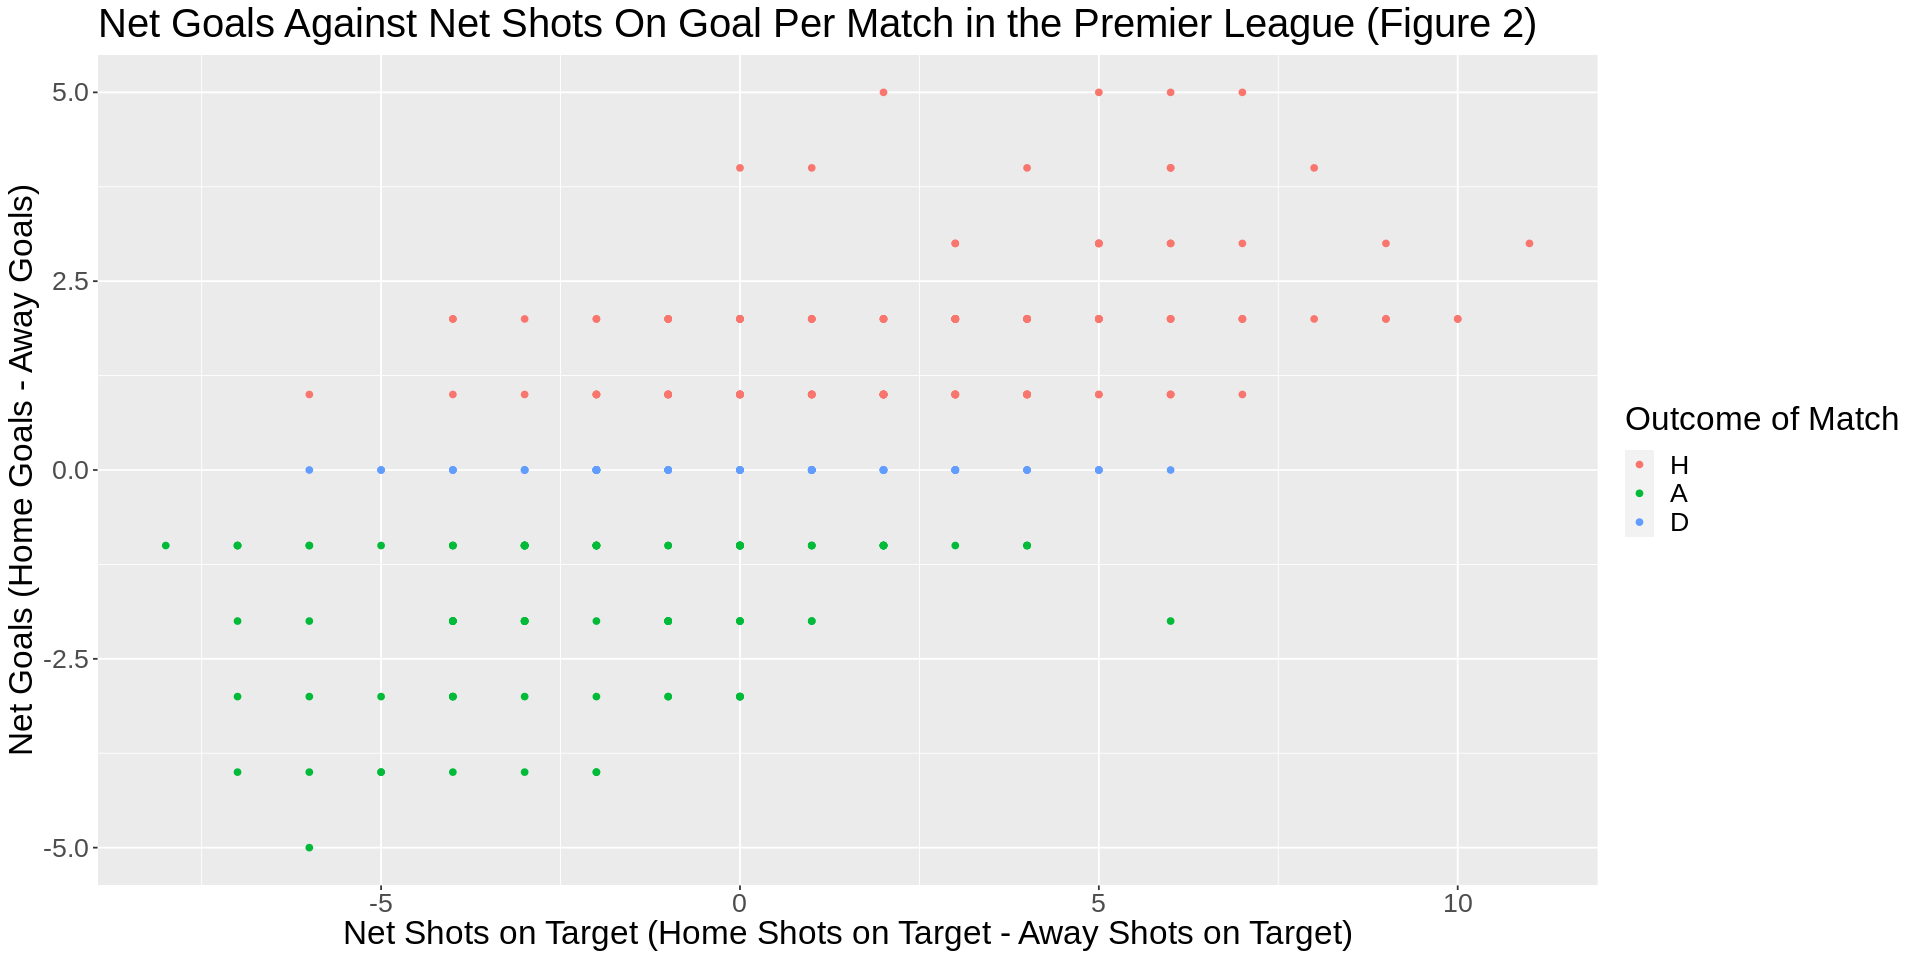

In [44]:
options(repr.plot.height = 8, repr.plot.width = 16)

netscore_vs_netshots_plot <- match_train %>% 
    mutate(NetScore = FTHG - FTAG, NetShots = HS - AS) %>% 
    ggplot(aes(x= NetShots, y = NetScore, color = FTR)) +
    geom_point() +
    labs(x= "Net Shots (Home Shots - Away Shots)", y = "Net Goals (Home Goals - Away Goals)", 
        color = "Outcome of Match") +
    ggtitle("Net Goals Against Net Shots Per Match in the Premier League (Figure 1)") +
    theme(text = element_text(size=20))

netscore_vs_netshots_ongoal_plot <- match_train %>% 
    mutate(NetScore = FTHG - FTAG, NetShotsOnGoal = HST - AST) %>% 
    ggplot(aes(x= NetShotsOnGoal, y = NetScore, color = FTR)) +
    geom_point() +
    labs(x= "Net Shots on Target (Home Shots on Target - Away Shots on Target)", 
         y = "Net Goals (Home Goals - Away Goals)",
        color = "Outcome of Match") +
    ggtitle("Net Goals Against Net Shots On Goal Per Match in the Premier League (Figure 2)") +
    theme(text = element_text(size=20))


netscore_vs_netshots_plot
netscore_vs_netshots_ongoal_plot

#### Note that:  H = Home Team Win | D = Draw/Tie | A = Away Team Win

#### Variable explanation:
We plan on using the following factors to conduct our data analysis:
Chosen Variables/Columns| Justification: 

FTHG and HG = Full Time Home Team Goals
Testing Data: Not used in our predictions
FTAG and AG = Full Time Away Team Goals
Testing Data: Not used in our predictions
FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)
Testing Data: Not used in our predictions
HTHG = Half Time Home Team Goals
Allows for performance assessment at half time when paired with total attempted team shots.
HTAG = Half Time Away Team Goals


HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)


HS = Home Team Shots
Combined with total team goals, total team shots allow us to further predict the accuracy of the team at halftime.
AS = Away Team Shots


HST = Home Team Shots on Target
(Shot blocked by opponent’s goalie)
This factor pair gives us an idea of how many times a team got close to the opponent’s net and the effectiveness of their 
opponent’s goalie.
AST = Away Team Shots on Target
(Shot blocked by opponent’s goalie)


HHW = Home Team Hit Woodwork
Alongside HST and AST, these factors show us how many times a team got within shooting distance of the net.
AHW = Away Team Hit Woodwork


HC = Home Team Corners
Shows a team’s accuracy and how often the team reaches the opponent’s goal.
AC = Away Team Corners


HFKC = Home Team Free Kicks Conceded


AFKC = Away Team Free Kicks Conceded


HO = Home Team Offsides
Frequency of fouls and how often the team is around the opponent’s goal
AO = Away Team Offsides



### Expected Outcomes and Significance
In our data analysis, we expect to successfully and accurately find the winner between two teams, alongside the final score. 
These findings could increase the probability of an accurate prediction regarding the outcome of a game between the two teams. Our 
analysis can then be used to answer future questions, such as: Which team in a league has the greatest chances of winning for 
the given season?


### Creating the Regression Model

Below we will create the regression model to predict NetScore using both KNN and linear regression to compare which method leads to a better result with a lower RMPSE. Minor iterations will also be done testing which predictor variables lead to the best regression results. 

In [45]:
match_train <- mutate(match_train, NetScore = FTHG - FTAG) # Creating the NetScore collumns for training data
match_test <- mutate(match_test, NetScore = FTHG - FTAG) # Creating the NetScore collumns for testing data

##### Creating KNN Regression Model

In [46]:
set.seed(1234) # setting the seed so the regression predictions are reproducible

# using 5-fold cross-validation to get multiple subsplits wihtin the training data to choose the best value for k
match_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
      set_engine("kknn") %>%
      set_mode("regression") 

# recipe variation 1, that includes less predictors. The predictors in this variable include: home/away team half time goals, home/away shots, 
# home/away shots on target and we also include existing betting data from other users to pickup trends in the betting odds. collumns B365H:IWA 
# all consist of the betting odds from various betting websites
match_recipe_home_1 <- recipe(NetScore ~ HTHG+HTAG+HS+AS+HST+AST+#HF+AF+HC+AC+HY+AY+HR+AR+
                            B365H+B365D+B365A+BWH+BWD+BWA+IWH+IWD+IWA, data = match_train) %>%
      step_scale(all_predictors()) %>%
      step_center(all_predictors())

# recipe variation 2: this one includes all the previous predictors in recipe 1 but add in; home/away fouls, home/away corners
match_recipe_home_2 <- recipe(NetScore ~ HTHG+HTAG+HS+AS+HST+AST+HF+AF+HC+AC+#HY+AY+HR+AR+
                            B365H+B365D+B365A+BWH+BWD+BWA+IWH+IWD+IWA, data = match_train) %>%
      step_scale(all_predictors()) %>%
      step_center(all_predictors())

# recipe variation 3: this one includes all the previous predictors in recipe 1&2 but add in; home/away yellow cards and home/away red cards
match_recipe_home_3 <- recipe(NetScore ~ HTHG+HTAG+HS+AS+HST+AST+HF+AF+HC+AC+#HY+AY+HR+AR+
                            B365H+B365D+B365A+BWH+BWD+BWA+IWH+IWD+IWA, data = match_train) %>%
      step_scale(all_predictors()) %>%
      step_center(all_predictors())

# splitting up the training data into 5 cross-validation splits so that random variations have less of an impact on the chosen k value
match_vfold <- vfold_cv(match_train, v=5, strata = NetScore)

# implementing each variation of the recipe into its own workflow so that we can compare which recipe gives the best predictions

# uses recipe 1:
match_workflow_1 <- workflow() %>% 
    add_recipe(match_recipe_home_1) %>% 
    add_model(match_spec)
# uses recipe 2:
match_workflow_2 <- workflow() %>% 
    add_recipe(match_recipe_home_2) %>% 
    add_model(match_spec)
# uses recipe 3:
match_workflow_3 <- workflow() %>% 
    add_recipe(match_recipe_home_3) %>% 
    add_model(match_spec)

# making a tibble of possible k values ranging from 1 to 200
gridvals <- tibble(neighbors = seq(from = 1, to = 200))

# now implemeniting each workflow and collecting metrics in order to compare each recipe
match_results_1 <- match_workflow_1 %>% 
        tune_grid(resamples = match_vfold, grid = gridvals) %>% 
        collect_metrics()
match_results_2 <- match_workflow_2 %>% 
        tune_grid(resamples = match_vfold, grid = gridvals) %>% 
        collect_metrics()
match_results_3 <- match_workflow_3 %>% 
        tune_grid(resamples = match_vfold, grid = gridvals) %>% 
        collect_metrics()

# Here we extract the best possible k value from each recipe variation
match_min_1 <- match_results_1 %>%
   filter(.metric == "rmse") %>%
   arrange(mean) %>% 
   slice(1)

### Table 5

In [47]:
match_min_1

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
11,rmse,standard,1.292751,5,0.05564039,Model011


In [49]:
match_min_2 <- match_results_2 %>%
   filter(.metric == "rmse") %>%
   arrange(mean) %>% 
   slice(1)

### Table 6

In [50]:
match_min_2

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
12,rmse,standard,1.30355,5,0.05642087,Model012


In [51]:
match_min_3 <- match_results_3 %>%
   filter(.metric == "rmse") %>%
   arrange(mean) %>%
slice(1)

### Table 7

In [52]:
match_min_3

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
12,rmse,standard,1.30355,5,0.05642087,Model012


Here we can observe that recipe 1 performs best with 10 neighbours but recipe's 2 and 3 perform best with 19 neighbours each. We can also observe that the mean RMSE also differs between each recipe. Recipe 1 has the lowest mean RMSE with a value of 1.309 compared to that of 1.326 given from recipe 2 and 3. This means that the combination that can give us the best possible predictions has k=10 and uses the predictors from recipe 1. This could be due to the fact that the extra added predictors don't contribute much significance and only add random noise that skews the predictions. 

Therefore, we will now continue the KNN regression using only match_recipe_home_1 and k=10 neighbours. 

In [53]:
set.seed(1234) # keeping the seed the same so that the results are reproducable

# using the best recipe combination and the best number of neihgbors (k=10)
k_min <- match_min_1 %>%
         pull(neighbors)

match_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>%
         set_engine("kknn") %>%
         set_mode("regression")

match_best_fit <- workflow() %>%
         add_recipe(match_recipe_home_1) %>%
         add_model(match_best_spec) %>%
         fit(data = match_train)

match_summary <- match_best_fit %>%
          predict(match_test) %>%
          bind_cols(match_test) %>%
          metrics(truth = NetScore, estimate = .pred)

### Table 8

In [54]:
match_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.3400277
rsq,standard,0.5876619
mae,standard,1.0135397


##### Now we have completed the training and testing of our KNN regression model. 

Rows: 286
Columns: 3
$ .pred    <int> 1, 2, -1, -2, -2, 2, -1, 3, 2, 1, 2, 1, -1, -2, 2, 0, 0, 3, …
$ NetScore <int> 1, 2, -2, -3, -1, 2, 0, 4, 1, 1, 2, 1, -2, -2, 2, 0, 0, 1, -…
$ error    <int> 0, 0, -1, -1, 1, 0, 1, 1, -1, 0, 0, 0, -1, 0, 0, 0, 0, -2, -…


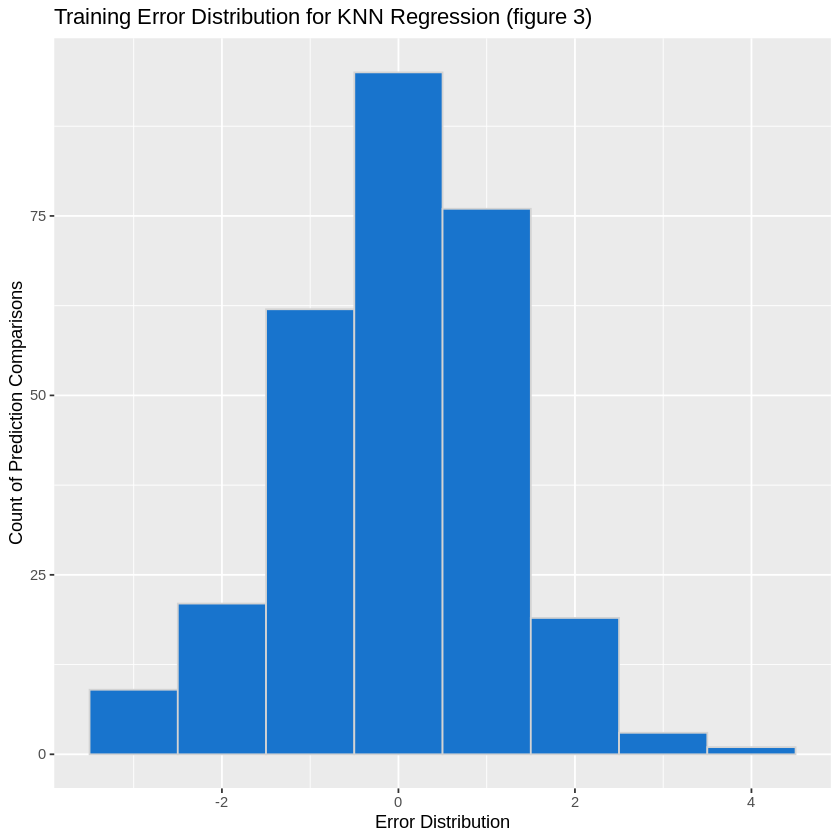

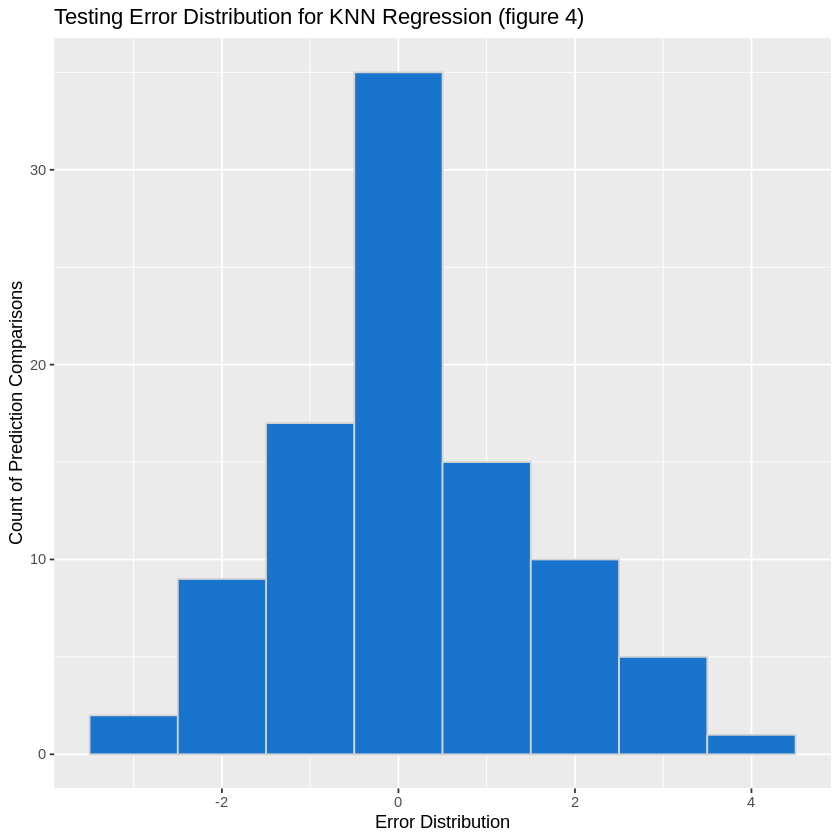

In [55]:
options(repr.plot.width = 7, repr.plot.height = 7) # here we set options for the graph to make a good visualization

# here we bind the collumns of the predictions to the actual values
match_preds_test <- match_best_fit %>% 
        predict(match_test) %>% 
        bind_cols(match_test) %>% 
        mutate(.pred = as.integer(round(.pred))) %>% 
        select(.pred, NetScore) %>%   #select only the real values and the predictions
        mutate(error = NetScore - .pred)

match_preds_train <- match_best_fit %>% 
        predict(match_train) %>% 
        bind_cols(match_train) %>% 
        mutate(.pred = as.integer(round(.pred))) %>% 
        select(.pred, NetScore) %>%   # select only the real values and the predictions
        mutate(error = NetScore - .pred) %>% 
        glimpse()      # we use the glimpse function to just see a visual numerical comparison between our predictions and the actual values

# Because of the high dimensonality of our data, we are unable to make a graph showing our predictions and our results in comparison to our predictors
# therefore instead, we plot a histogram to see our error distrubution, where the error is equal to the difference between the predicted value
# and the actual value.

error_dist_train <- ggplot(match_preds_train, aes(x= error)) + 
   geom_histogram(fill = "dodgerblue3", color = "lightgrey", binwidth = 1) +
   xlab("Error Distribution") +
   ylab("Count of Prediction Comparisons") +
   ggtitle("Training Error Distribution for KNN Regression (figure 3)")

error_dist_test <- ggplot(match_preds_test, aes(x= error)) + 
   geom_histogram(fill = "dodgerblue3", color = "lightgrey", binwidth = 1) +
   xlab("Error Distribution") +
   ylab("Count of Prediction Comparisons") +
   ggtitle("Testing Error Distribution for KNN Regression (figure 4)")

error_dist_train
error_dist_test

Therefore we are finally able to visualize how well our model predicts testing data versus using training data. The x-axis of the histogram represents how close the prediction is to the actual value. Therefore a negative x value means that the predictor was too high (NetScore- .pred) and a positive x value means that the model underpredicted the real value. We can see from the histograms that the error in the training data creates a symmetric bell curve but the testing data creates a bell curve that is asymmetrical and skewed to the right. This makes sense as obviously our training data would have less error because that is the data it was trained with. 

From our testing error distribution, we can see that the model tends to underpredict the values of the NetScore, but overall it still has a defined peak near x=0.

### Linear Regression Model Creation

In [56]:
set.seed(2020) # DO NOT REMOVE

# creating a linear spec for linear regression
lm_spec <- linear_reg() %>% 
    set_engine("lm") %>% 
    set_mode("regression")

# creating a fitting using the training data and the best recipe identified earlier.
lm_match_fit <- workflow() %>% 
    add_recipe(match_recipe_home_1) %>%  # using the best recipe pinpointed during the knn regression comparison
    add_model(lm_spec) %>% 
    fit(data = match_train) # fitting the model to the training data

# calculating the final rmpse with the testing data and the model
lm_match_rmspe <- lm_match_fit %>% 
    predict(match_test) %>% 
    bind_cols(match_test) %>% 
    metrics(truth = NetScore, estimate = .pred) %>% 
    filter(.metric == "rmse") %>% 
    select(.estimate) %>% 
    pull()
lm_match_rmspe

[1] 1.147933

### Comparing Linear and KNN Regression
When comparing the RMSPE between knn and linear regression, we can observe that (Linear RMPSE = 1.30) and (KNN RMPSE = 1.39). This means that our linear regression model actually predicts the real NetScore better than the knn model! Thus, our final model should actually be the linear model. This is because the linear RMPSE is smaller than the knn RMPSE. 

Let's create the same kind of histogram we created earlier to see how the error distribution is and if that is visually better as well. 

Rows: 286
Columns: 3
$ .pred    <int> 2, 1, -2, -2, -2, 2, 0, 3, 1, 2, 2, 1, -1, -2, 1, 0, 0, 2, 0…
$ NetScore <int> 1, 2, -2, -3, -1, 2, 0, 4, 1, 1, 2, 1, -2, -2, 2, 0, 0, 1, -…
$ error    <int> -1, 1, 0, -1, 1, 0, 0, 1, 0, -1, 0, 0, -1, 0, 1, 0, 0, -1, -…


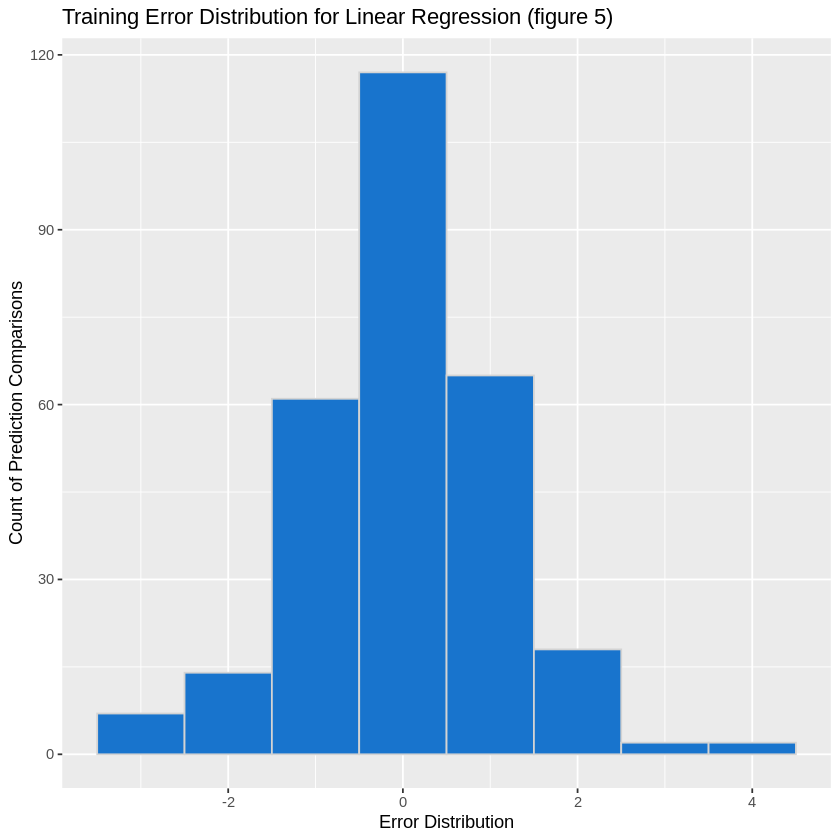

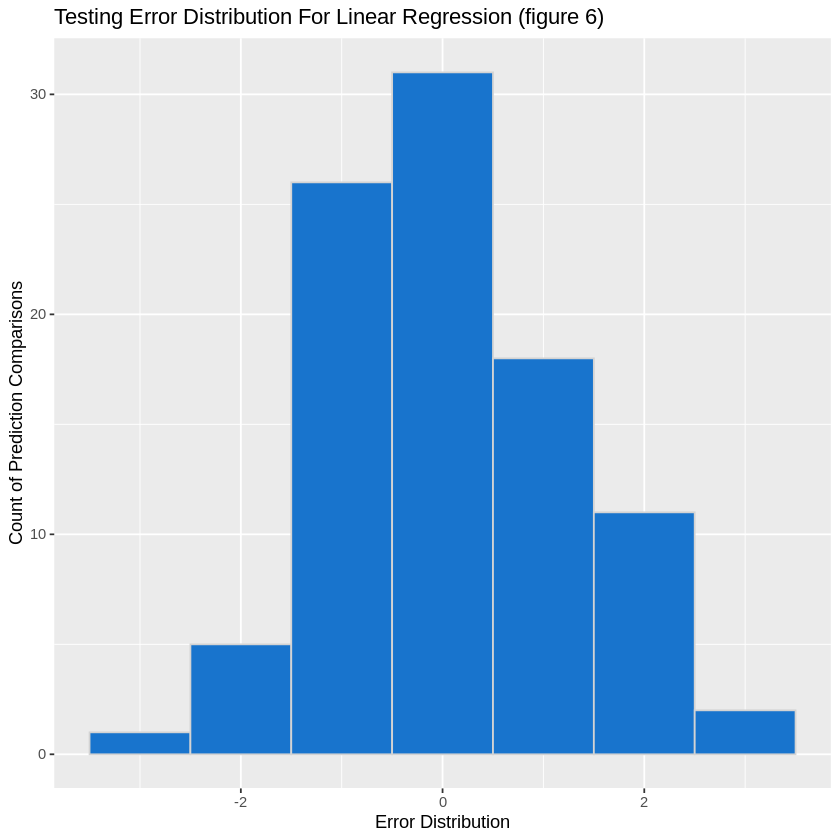

In [57]:
# here we bind the collumns of the predictions to the actual values
match_preds_test_lm <- lm_match_fit %>% 
        predict(match_test) %>% 
        bind_cols(match_test) %>% 
        mutate(.pred = as.integer(round(.pred))) %>% 
        select(.pred, NetScore) %>%   # select only the real values and the predictions
        mutate(error = NetScore - .pred)

match_preds_train_lm <- lm_match_fit %>% 
        predict(match_train) %>% 
        bind_cols(match_train) %>% 
        mutate(.pred = as.integer(round(.pred))) %>% 
        select(.pred, NetScore) %>%   # select only the real values and the predictions
        mutate(error = NetScore - .pred) %>% 
        glimpse()      # we use the glimpse function to just see a visual numerical comparison between our predictions and the actual values

# Because of the high dimensonality of our data, we are unable to make a graph showing our predictions and our results in comparison to our predictors
# therefore instead, we plot a histogram to see our error distrubution, where the error is equal to the difference between the predicted value
# and the actual value.

error_dist_train_lm <- ggplot(match_preds_train_lm, aes(x= error)) + 
   geom_histogram(fill = "dodgerblue3", color = "lightgrey", binwidth = 1) +
   xlab("Error Distribution") +
   ylab("Count of Prediction Comparisons") +
   ggtitle("Training Error Distribution for Linear Regression (figure 5)")

error_dist_test_lm <- ggplot(match_preds_test_lm, aes(x= error)) + 
   geom_histogram(fill = "dodgerblue3", color = "lightgrey", binwidth = 1) +
   xlab("Error Distribution") +
   ylab("Count of Prediction Comparisons") +
   ggtitle("Testing Error Distribution For Linear Regression (figure 6)")

error_dist_train_lm
error_dist_test_lm

### Lets Plot the Linear and Eegression Error Distribution Histograms Side by Side.

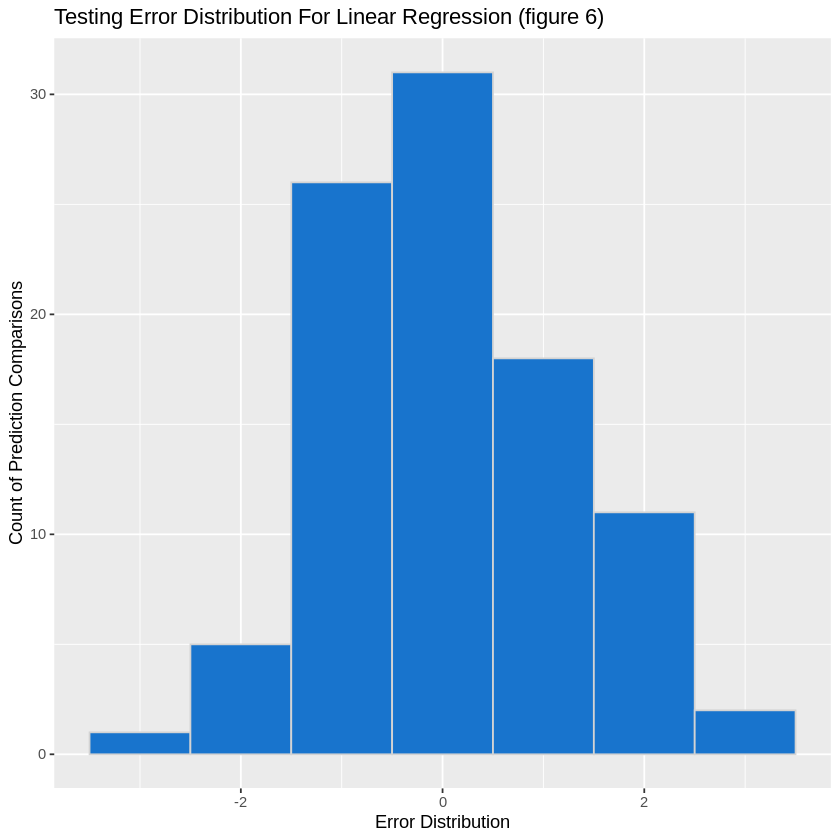

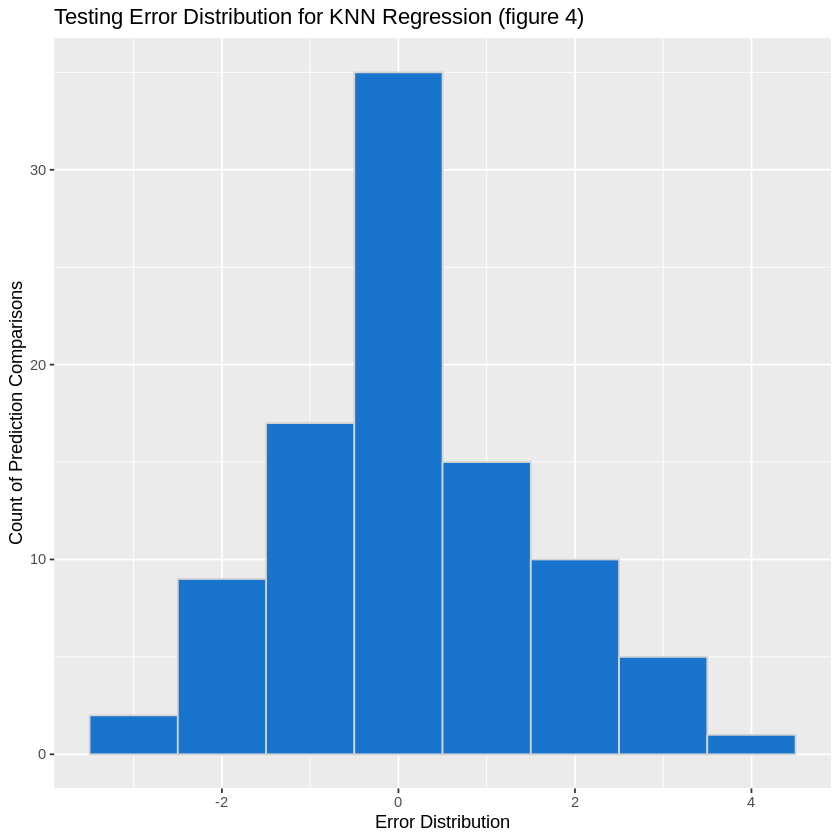

In [58]:
error_dist_test_lm
error_dist_test

## Discussion

Using our method of analysis, we were able to predict what the score is between two teams after a soccer match by using the process of KNN regression and linear regression. By using both of these methods, we can draw multiple conclusions. What was found when using KNN regression was a mixture of inaccurate and accurate predictions. In the histograms that are titled “Testing Error Distribution for KNN Regression '' and “Training Error Distribution for KNN Regression,” we are able to depict if our predictions are accurate. The x-axis labeled “Error Distribution” represents how close the prediction is to the actual value. A negative value represents that our predicted value is much higher than the actual value and a positive value represents that our model predicted a value that is much lower than the actual value. 


By interpreting these KNN histograms, one can see that the distribution is mostly in the x-coordinate, zero. This means the majority of our predictions were correct. The table above these histograms illustrates a comparison between the values we predicted and the actual total score. Under the columns .pred and NetScore there is an integer that identifies the number of goals either the home or away team. The negative integers indicate that the away team and the positive integers indicate that the home team won. By having these results under our .pred column, we were able to make a confident prediction of which team won, while comparing these results to the values under the NetScore column. However, knowing that our results were not as accurate as we wanted, we decided to try using the linear regression method to see if our results would improve. By following similar steps, we produced two histograms again (“Testing Error Distribution for Linear Regression'' and “Training Error Distribution for Linear Regression''). Again we saw that the data on the was histogram mostly distributed towards the x-coordinate zero. This then allowed us to infer that the linear regression method does work well for our dataset. We then compared the RMSPE (root mean prediction square error) to see which model produces more error. With the KNN regression model having an RMSPE value of 1.39 and the linear regression model having one of 1.30, we concluded that the linear regression model had less possibility of error making that model more accurate. 


Overall, our predictions with both models did not one-hundred percent match the actual results that were taken from the dataset, but this was expected due to reasons beyond our control. This is primarily due to the fact that we cannot determine how a player plays because of so many outside influences that may have an impact. These potential influences could vary anywhere from a player’s personal life to the weather, but it is unknown to us. Even with our outlying predictions, this prediction method could open so many new doors within the sporting community. That means that soccer is not the only sport that this method could work for. Our regression method could be used for football, basketball, and other sports that utilize these similar tactics and rules. The only difference would be the predictors one uses to make a prediction. 


Within the world of sports, being able to use a regression algorithm to predict sports outcomes can and does lead to a plethora of questions that have a great impact on the sporting world. It also raises follow-up questions specific to the game of soccer, such as: “Why does the number of corner kicks correspond to more goals and how can my team play to increase the number of corner kicks and goals?”, “How does my team committing a foul on the other team decrease our chances of winning?”, or “Is it statistically better to commit a foul to prevent a corner or is it statistically better to allow the corner to happen to minimize the chances of being scored on?” Using statistical backed information on the game of soccer, in addition to taking into account external factors that are not taken into account in the model such as climate and team morale, it would be interesting to further investigate how the coach can create a game plan for the players such that a team has a higher statistically backed chance of winning. 


## References

English Premier League (football). DataHub. (n.d.). Retrieved April 7, 2022, from https://datahub.io/sports-data/english-premier-league#data 

Horky, T., & Pelka, P. (2017). Data Visualisation in Sports Journalism. Digital Journalism, 5(5), 587–606. https://doi.org/10.1080/21670811.2016.1254053 

Link, D. (2018). Data Analytics in Professional Soccer. Springer Vieweg, Wiesbaden, 1–136. https://doi.org/10.1007/978-3-658-21177-6 

Rue, H., & Salvesen, O. (2000). Prediction and retrospective analysis of soccer matches in a league. Journal of the Royal Statistical Society: Series D (The Statistician), 49(3), 399–418. https://doi.org/10.1111/1467-9884.00243 

The 8 most popular sports to bet on in the world. Pledge Sports. (2022, March 31). Retrieved April 7, 2022, from https://www.pledgesports.org/2020/05/most-popular-sports-to-bet-on/ 